In [146]:
#Load python packages
import pandas as pd
import numpy as np

#Import UFC Fight data, create new variables (columns)
df = pd.read_csv('/Users/gregzaimes/Desktop/UFC/UFC Fight Data.csv')
df["Body_Attempt"] = df["B_avg_BODY_att"]/df["R_avg_BODY_att"]
df["Body_Landed"]=df["B_avg_BODY_landed"]/df["R_avg_BODY_landed"]
df["Clinch_Attempt"]=df["B_avg_CLINCH_att"]/df["R_avg_CLINCH_att"]
df["Clinch_Land"]=df["B_avg_CLINCH_landed"]/df["R_avg_CLINCH_landed"]
df["Distance_Attempt"]=df["B_avg_DISTANCE_att"]/df["R_avg_DISTANCE_att"]
df["Distance_Landed"]=df["B_avg_DISTANCE_landed"]/df["R_avg_DISTANCE_landed"]
df["Ground_Attempt"]=df["B_avg_GROUND_att"]/df["R_avg_GROUND_att"]
df["Ground_Landed"]=df["B_avg_GROUND_landed"]/df["R_avg_GROUND_landed"]
df["Head_Attempt"]=df["B_avg_HEAD_att"]/df["R_avg_HEAD_att"]
df["Head_Landed"]=df["B_avg_HEAD_landed"]/df["R_avg_HEAD_landed"]
df["KD_avg"]=df["B_avg_KD"]/df["R_avg_KD"]
df["Leg_Attempt"]=df["B_avg_LEG_att"]/df["R_avg_LEG_att"]
df["Leg_Landed"]=df["B_avg_LEG_landed"]/df["R_avg_LEG_landed"]
df["Pass_Avg"]=df["B_avg_PASS"]/df["R_avg_PASS"]
df["Rev_Avg"]=df["B_avg_REV"]/df["R_avg_PASS"]
df["Sig_Str_Att"]=df["B_avg_SIG_STR_att"]/df["R_avg_SIG_STR_att"]
df["Sig_Str_Landed"]=df["B_avg_SIG_STR_landed"]/df["R_avg_SIG_STR_landed"]
df["Sig_Str_Pct"]=df["B_avg_SIG_STR_pct"]/df["R_avg_SIG_STR_pct"]
df["Sub_Att"]=df["B_avg_SUB_ATT"]/df["R_avg_SUB_ATT"]
df["TD_Att"]=df["B_avg_TD_att"]/df["R_avg_TD_att"]
df["TD_Landed"]=df["B_avg_TD_landed"]/df["R_avg_TD_landed"]
df["TD_Pct"]=df["B_avg_TD_pct"]/df["R_avg_TD_pct"]
df["Total_Str_Att"]=df["B_avg_TOTAL_STR_att"]/df["R_avg_TOTAL_STR_att"]
df["Total_Str_Landed"]=df["B_avg_TOTAL_STR_landed"]/df["R_avg_TOTAL_STR_landed"]

# Drop and replace any erroneous values (e.g. NaN/Infinity)
df=df.replace([np.inf, -np.inf], np.nan)
df=df.dropna()

In [147]:
# Examine the number of fights for each weight class
df_agg = df.groupby(["weight_class"])['R_fighter'].count()
print(df_agg)

weight_class
Bantamweight             87
Catch Weight              7
Featherweight           153
Flyweight                59
Heavyweight             126
Light Heavyweight       175
Lightweight             331
Middleweight            214
Welterweight            336
Women's Bantamweight     14
Women's Flyweight         3
Women's Strawweight      12
Name: R_fighter, dtype: int64


In [161]:
#Import python package
from sklearn.model_selection import train_test_split

# Choose one of the following weight classes to subset the UFC dataset
# Looking at Welterweight as it has the highest volume of data out of the weight classes
#df_sub = df[(df["weight_class"] == "Lightweight") | (df["weight_class"] == "Middleweight") | (df["weight_class"] == "Welterweight") | (df["weight_class"] == "Featherweight")]
# df_sub = df[(df["weight_class"] == "Bantamweight")]
# df_sub = df[(df["weight_class"] == "Featherweight")]
# df_sub= df[(df["weight_class"] == "Welterweight")]

# Set the data and target variables
data = df[["B_current_lose_streak","B_current_win_streak","B_avg_BODY_att","B_avg_BODY_landed","B_avg_CLINCH_att","B_avg_CLINCH_landed","B_avg_DISTANCE_att","B_avg_DISTANCE_landed","B_avg_GROUND_att","B_avg_GROUND_landed","B_avg_HEAD_att","B_avg_HEAD_landed","B_avg_KD","B_avg_LEG_att","B_avg_LEG_landed","B_avg_PASS","B_avg_REV","B_avg_SIG_STR_att","B_avg_SIG_STR_landed","B_avg_SIG_STR_pct","B_avg_SUB_ATT","B_avg_TD_att","B_avg_TD_landed","B_avg_TD_pct","B_avg_TOTAL_STR_att","B_avg_TOTAL_STR_landed","B_longest_win_streak","B_losses","B_avg_opp_BODY_att","B_avg_opp_BODY_landed","B_avg_opp_CLINCH_att","B_avg_opp_CLINCH_landed","B_avg_opp_DISTANCE_att","B_avg_opp_DISTANCE_landed","B_avg_opp_GROUND_att","B_avg_opp_GROUND_landed","B_avg_opp_HEAD_att","B_avg_opp_HEAD_landed","B_avg_opp_KD","B_avg_opp_LEG_att","B_avg_opp_LEG_landed","B_avg_opp_PASS","B_avg_opp_REV","B_avg_opp_SIG_STR_att","B_avg_opp_SIG_STR_landed","B_avg_opp_SIG_STR_pct","B_avg_opp_SUB_ATT","B_avg_opp_TD_att","B_avg_opp_TD_landed","B_avg_opp_TD_pct","B_avg_opp_TOTAL_STR_att","B_avg_opp_TOTAL_STR_landed","B_total_rounds_fought","B_total_time_fought(seconds)","B_total_title_bouts","B_win_by_Decision_Majority","B_win_by_Decision_Split","B_win_by_Decision_Unanimous","B_win_by_KO/TKO","B_win_by_Submission","B_win_by_TKO_Doctor_Stoppage","B_wins","R_current_lose_streak","R_current_win_streak","R_avg_BODY_att","R_avg_BODY_landed","R_avg_CLINCH_att","R_avg_CLINCH_landed","R_avg_DISTANCE_att","R_avg_DISTANCE_landed","R_avg_GROUND_att","R_avg_GROUND_landed","R_avg_HEAD_att","R_avg_HEAD_landed","R_avg_KD","R_avg_LEG_att","R_avg_LEG_landed","R_avg_PASS","R_avg_REV","R_avg_SIG_STR_att","R_avg_SIG_STR_landed","R_avg_SIG_STR_pct","R_avg_SUB_ATT","R_avg_TD_att","R_avg_TD_landed","R_avg_TD_pct","R_avg_TOTAL_STR_att","R_avg_TOTAL_STR_landed","R_longest_win_streak","R_losses","R_avg_opp_BODY_att","R_avg_opp_BODY_landed","R_avg_opp_CLINCH_att","R_avg_opp_CLINCH_landed","R_avg_opp_DISTANCE_att","R_avg_opp_DISTANCE_landed","R_avg_opp_GROUND_att","R_avg_opp_GROUND_landed","R_avg_opp_HEAD_att","R_avg_opp_HEAD_landed","R_avg_opp_KD","R_avg_opp_LEG_att","R_avg_opp_LEG_landed","R_avg_opp_PASS","R_avg_opp_REV","R_avg_opp_SIG_STR_att","R_avg_opp_SIG_STR_landed","R_avg_opp_SIG_STR_pct","R_avg_opp_SUB_ATT","R_avg_opp_TD_att","R_avg_opp_TD_landed","R_avg_opp_TD_pct","R_avg_opp_TOTAL_STR_att","R_avg_opp_TOTAL_STR_landed","R_total_rounds_fought","R_total_time_fought(seconds)","R_total_title_bouts","R_win_by_Decision_Majority","R_win_by_Decision_Split","R_win_by_Decision_Unanimous","R_win_by_KO/TKO","R_win_by_Submission","R_win_by_TKO_Doctor_Stoppage","R_wins"]]
df_columns = data.columns.values.tolist()
target = df["WinnerNum"]

# Convert the 'data' and target dataframes into numpy arrays. 
# This is the required format for KFold cross validation
data_numpy = data.to_numpy()
target_numpy = target.to_numpy()

In [160]:
# Import python package
from sklearn.preprocessing import RobustScaler

# Scale UFC fight data using 'robust' scaler
# Currently, the robust scaler is scaling the ENTIRE dataset.
# Additional work is needed to apply the robust scaler to individual columns of the dataset
robust = RobustScaler()
data_numpy_robust = robust.fit_transform(data_numpy)


# Import python package
from sklearn.preprocessing import StandardScaler

# Unfinished - This needs more work
scaler = StandardScaler()
data_numpy_standard_scaler = scaler.fit_transform(data_numpy)


# Import python package
from sklearn.preprocessing import MinMaxScaler

# Unfinished - This needs more work
minmax = MinMaxScaler()
data_numpy_minmax = minmax.fit_transform(data_numpy)


# Import python package
from sklearn.preprocessing import Normalizer

# Unfinished - This needs more work
norm = Normalizer()
data_numpy_norm = norm.fit_transform(data_numpy)

[[ 0.          0.00435342  0.01001286 ...,  0.          0.          0.00870683]
 [ 0.          0.00317021  0.01622604 ...,  0.00634043  0.00105674
   0.01479433]
 [ 0.          0.00096105  0.00696759 ...,  0.00288314  0.          0.00961047]
 ..., 
 [ 0.          0.00137935  0.         ...,  0.          0.          0.00551739]
 [ 0.          0.00166135  0.00166135 ...,  0.00166135  0.00166135
   0.00996807]
 [ 0.          0.00410968  0.01050251 ...,  0.00136989  0.00136989
   0.00684946]]


In [195]:
# Import python packages
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn import metrics

# Parameterize the number of KFolds. For now, set the number of folds equal to 10
rkf = RepeatedKFold(n_splits=10, n_repeats=100, random_state=1234)

# This splits the data into the number of specified folds
rkf.get_n_splits(data_numpy)

# Set up a blank list and DataFrame, for which we will append accuracy scores 
# in the subsequent For-Loop
accuracy = []
all_scores = pd.DataFrame()

# Create For-Loop to loop through the cross folds of the data-set
for train_index, test_index in rkf.split(data_numpy):
    X_train, X_test = data_numpy[train_index], data_numpy[test_index]
    y_train, y_test = target_numpy[train_index], target_numpy[test_index]
    
    # Choose the preferred classifier and associated parameters (e.g. max_iter, C, etc.)
    # Currently only 3 are loaded, LinearSVC, LogReg, and Ridge--we can add others
    #clf = LinearSVC(max_iter=1000, C = 10)
    #clf = LogisticRegression(solver = "lbfgs", C = 10, max_iter = 1000)
    clf = RidgeClassifier(normalize = True)
    clf.fit(X_train,y_train) # Fit the classifer based on X_train, and y_train 
    y_pred=clf.predict(X_test) # Make predictions based on X_test set
    score = metrics.accuracy_score(y_test, y_pred) # Determine the Model accuracy 
    accuracy.append(score) # Append the accuracy scores to the 'accuracy' list
all_scores["Folds"] = accuracy # Port the accuracy scores into the all_scores DataFrame

In [196]:
# Print the Classifier Accuracies across the KFolds
print(all_scores)
print("Average Accuracy: " + str(all_scores["Folds"].mean()))

        Folds
0    0.664474
1    0.625000
2    0.703947
3    0.638158
4    0.684211
5    0.644737
6    0.598684
7    0.622517
8    0.609272
9    0.662252
10   0.677632
11   0.638158
12   0.644737
13   0.671053
14   0.638158
15   0.677632
16   0.664474
17   0.649007
18   0.543046
19   0.649007
20   0.631579
21   0.638158
22   0.598684
23   0.657895
24   0.651316
25   0.697368
26   0.618421
27   0.708609
28   0.668874
29   0.596026
..        ...
970  0.644737
971  0.578947
972  0.671053
973  0.618421
974  0.664474
975  0.677632
976  0.605263
977  0.741722
978  0.649007
979  0.662252
980  0.703947
981  0.546053
982  0.677632
983  0.664474
984  0.644737
985  0.690789
986  0.572368
987  0.701987
988  0.662252
989  0.629139
990  0.578947
991  0.618421
992  0.710526
993  0.598684
994  0.651316
995  0.651316
996  0.631579
997  0.754967
998  0.649007
999  0.642384

[1000 rows x 1 columns]
Average Accuracy: 0.6463204078075977


/Users/gregzaimes/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


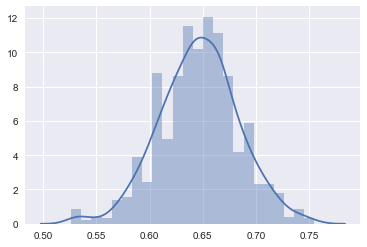

In [197]:
# Import Python Modules
import seaborn as sns
import matplotlib.pyplot as plt

# Use Seaborn to Create a histogram of the Accuracies between the KFolds
%matplotlib inline 
sns.distplot(accuracy)

In [198]:

# Create dictionary to map Feature Weights to Feature Metadata
coef_dict = {}
for coef, feat in zip(abs(clf.coef_[0]),df_columns):
    coef_dict[feat] = coef 
    
# Pull out and sort the Feature Weights of the Classifier, in ascending order
feature_weights_sorted = sorted(coef_dict.items(), key=lambda x: x[1], reverse = True)
feature_weights_sorted

[('R_avg_opp_SIG_STR_pct', 0.3291005181171906),
 ('R_avg_opp_KD', 0.18071831310570094),
 ('B_avg_opp_SIG_STR_pct', 0.14373642636686138),
 ('B_avg_opp_TD_pct', 0.099054436752032765),
 ('R_avg_opp_REV', 0.087877484141947085),
 ('R_avg_TD_pct', 0.084186208167398024),
 ('R_avg_REV', 0.074950536471118684),
 ('B_win_by_TKO_Doctor_Stoppage', 0.072115936860296354),
 ('R_avg_opp_TD_pct', 0.06794411110261131),
 ('B_win_by_Decision_Majority', 0.060853143333292045),
 ('B_avg_opp_KD', 0.056217206366204177),
 ('B_avg_opp_SUB_ATT', 0.052544759553723022),
 ('R_win_by_Decision_Split', 0.046472146255737687),
 ('B_win_by_Decision_Split', 0.042116090427938159),
 ('B_avg_opp_REV', 0.03908252363950724),
 ('R_win_by_TKO_Doctor_Stoppage', 0.035039457408728394),
 ('R_avg_SIG_STR_pct', 0.032019315959790767),
 ('R_avg_opp_PASS', 0.031087453190329756),
 ('B_avg_TD_pct', 0.028619296826187756),
 ('R_win_by_Decision_Majority', 0.024599732981915635),
 ('R_avg_PASS', 0.022375132581967539),
 ('B_avg_TD_landed', 0.02083